In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from torch.distributions import Normal

from palettable.cmocean.sequential import Thermal_8

palette = Thermal_8.mpl_colors
sns.set(style="whitegrid", font_scale=2.0, palette=Thermal_8.mpl_colors)

In [2]:
def get_distribution(eta):
    alpha = torch.tensor([1. + eta, eta])
    var = (1./alpha + 1).log()
    y = alpha.log() - var / 2
    return Normal(y, var.sqrt())

In [3]:
yvals = torch.linspace(-20, 20, 1000).unsqueeze(-1).repeat(1, 2)

In [4]:
alpha_list = [0.001, 0.01, 0.1, 0.25]
dist_list = [get_distribution(alpha).log_prob(yvals).exp() for alpha in alpha_list]

Text(0.5, 1.0, 'Unobserved Class')

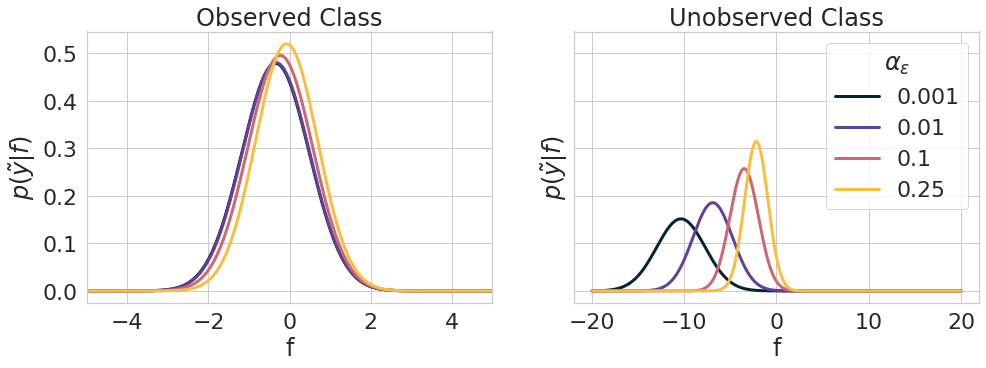

In [5]:
fig, ax = plt.subplots(1, 2, figsize = (16,5), sharey=True)

for i in range(4):
    ax[0].plot(yvals[...,0], dist_list[i][..., 0], linewidth=3, color=palette[i*2])
ax[0].set_xlim((-5, 5))


for i in range(4):
    ax[1].plot(yvals[..., 0], dist_list[i][..., 1], linewidth=3, color = palette[i*2], label = str(alpha_list[i]), )
ax[1].legend(title=r'$\alpha_\epsilon$')   
ax[0].set_xlabel("f")
ax[1].set_xlabel("f")
ax[0].set_ylabel(r'$p(\tilde{y} | f)$')
ax[1].set_ylabel(r'$p(\tilde{y} | f)$')

ax[0].set_title("Observed Class")
ax[1].set_title("Unobserved Class")
# [plt.setp(a.spines.values(), linewidth=3) for a in ax]
# sns.despine()

# plt.savefig("dirichlet_likelihoods.pdf", bbox_inches = "tight")

In [13]:
ps = torch.linspace(1/500, 1., 500)

In [14]:
logit_space = torch.stack((ps.log(), (ps).log())).t()

In [15]:
logit_space.shape

torch.Size([500, 2])

In [16]:
alpha_list = [0.001, 0.01, 0.1, 0.25]
dist_list = [get_distribution(alpha).log_prob(logit_space).exp() for alpha in alpha_list]

Text(0.5, 1.0, 'Unobserved Class')

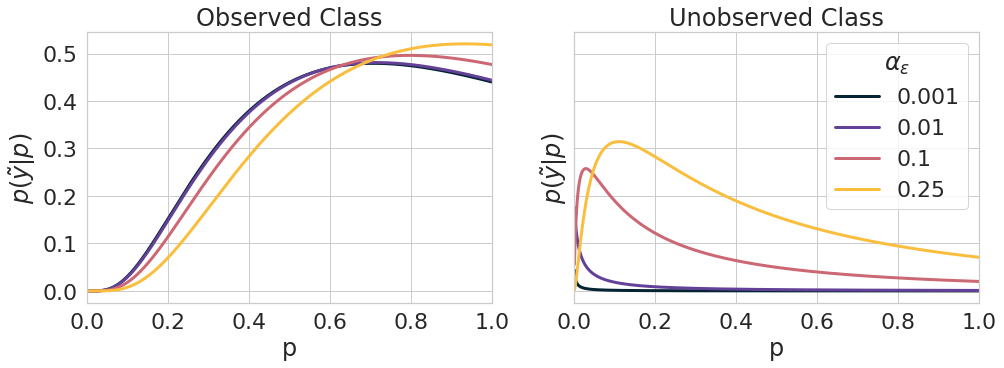

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (16,5), sharey=True)

for i in range(4):
    ax[0].plot(ps, dist_list[i][..., 0], linewidth=3, color=palette[i*2])
ax[0].set_xlim((0, 1))
ax[1].set_xlim((0, 1))

for i in range(4):
    ax[1].plot(ps, dist_list[i][..., 1], linewidth=3, color = palette[i*2], label = str(alpha_list[i]), )
ax[1].legend(title=r'$\alpha_\epsilon$')   
ax[0].set_xlabel("p")
ax[1].set_xlabel("p")
ax[0].set_ylabel(r'$p(\tilde{y} | p)$')
ax[1].set_ylabel(r'$p(\tilde{y} | p)$')

ax[0].set_title("Observed Class")
ax[1].set_title("Unobserved Class")

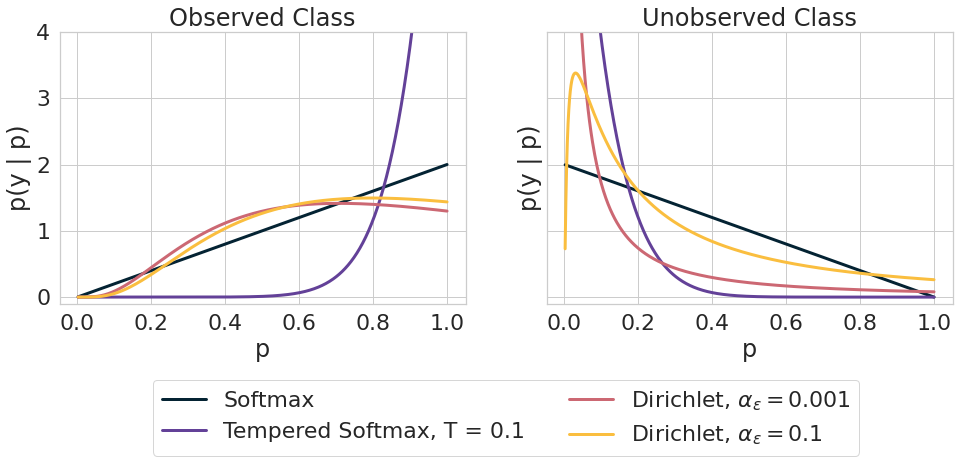

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5), sharey=True)
ax[0].plot(ps, ps * 2, linewidth = 3)
ax[1].plot(ps, (1 - ps) * 2, linewidth = 3, label = "Softmax")

ax[0].plot(ps, (ps**(1/0.1)) / (ps**(1/0.1)).sum() * 500, linewidth =3, color = palette[2])
ax[1].plot(ps, ((1 - ps)**(1/0.1)) / ((1 - ps)**(1/0.1)).sum() * 500, linewidth =3, 
           label = "Tempered Softmax, T = 0.1", color = palette[2])

ax[0].plot(ps, dist_list[0][..., 0] / dist_list[0][..., 0].sum() * 500, linewidth = 3, color = palette[4])
ax[1].plot(ps, dist_list[0][..., 1] / dist_list[0][..., 1].sum() * 500, linewidth = 3, color = palette[4],
           label = r'Dirichlet, $\alpha_\epsilon=0.001$')

ax[0].plot(ps, dist_list[2][..., 0] / dist_list[2][..., 0].sum() * 500, linewidth = 3, color = palette[6])
ax[1].plot(ps, dist_list[2][..., 1] / dist_list[2][..., 1].sum() * 500, linewidth = 3, color = palette[6],
           label = r'Dirichlet, $\alpha_\epsilon=0.1$')

ax[1].legend(ncol = 2, loc = "lower center", bbox_to_anchor = (-0.1, -0.6))

ax[0].set_ylim((-0.1, 4))

ax[0].set_xlabel("p")
ax[1].set_xlabel("p")

ax[0].set_ylabel("p(y | p)")
ax[1].set_ylabel("p(y | p)")

ax[0].set_title("Observed Class")
ax[1].set_title("Unobserved Class")
plt.savefig("likelihoods_obs_models.pdf", bbox_inches = "tight")

In [19]:
dist_list[0][..., 0].sum() / 500

tensor(0.3390)